In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [2]:
cancer = load_breast_cancer()

In [3]:
#데이터분할 
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   random_state=0)

In [4]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [5]:
tree.score(X_train, y_train), tree.score(X_test,y_test)

(1.0, 0.8811188811188811)

In [6]:
tree.tree_.max_depth

8

In [7]:
tree = DecisionTreeClassifier(max_depth=4 ,random_state=0)
tree.fit(X_train, y_train)
tree.score(X_train, y_train), tree.score(X_test,y_test)

(0.9929577464788732, 0.9020979020979021)

### 시각화

In [8]:
from sklearn.tree import export_graphviz

In [9]:
export_graphviz(tree, out_file='tree.dot', class_names=['cancer','normal']
               ,feature_names=cancer.feature_names, impurity=False, filled=True)

### 특성 중요도

In [10]:
tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.72099985, 0.        , 0.        ,
       0.        , 0.        , 0.02007711, 0.01727487, 0.        ,
       0.        , 0.        , 0.        , 0.0124106 , 0.        ,
       0.        , 0.05097828, 0.        , 0.11722141, 0.        ,
       0.03525964, 0.01026499, 0.        , 0.        , 0.01551325])

In [11]:
import matplotlib.pyplot as plt 
import numpy as np

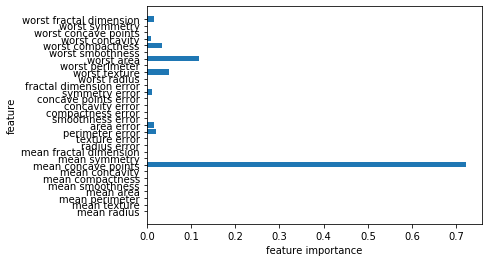

In [15]:
def plot_feature(model):
    plt.barh(range(30), model.feature_importances_)
    plt.yticks(np.arange(30), cancer.feature_names)
    plt.xlabel('feature importance')
    plt.ylabel('feature')
    plt.show()
plot_feature(tree)    

### RandomForest

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
forest = RandomForestClassifier(random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [18]:
forest.score(X_train, y_train), forest.score(X_test, y_test)

(1.0, 0.9790209790209791)

In [25]:
forest = RandomForestClassifier(n_estimators= 100,random_state=2)
forest.fit(X_train, y_train)
forest.score(X_train, y_train), forest.score(X_test, y_test)

(1.0, 0.9790209790209791)

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

In [27]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)
gbrt.score(X_train, y_train), gbrt.score(X_test, y_test)

(0.9882629107981221, 0.965034965034965)

In [28]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
gbrt.score(X_train, y_train), gbrt.score(X_test, y_test)

(1.0, 0.965034965034965)

### 최적의 파라미터 

In [29]:
from sklearn.model_selection import GridSearchCV

In [31]:
param_list = {'n_estimators':[5,10,50,100,200,500],
             'max_depth':[1,2,3,4,5],
             'learning_rate':[0.001, 0.01, 0.1, 1]}
gs = GridSearchCV(gbrt, param_list, cv=5)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [32]:
gs.best_params_

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 500}

In [33]:
gs.best_score_   # train의 성능 

0.9717920656634748

In [34]:
gs.estimator

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [35]:
gs.cv_results_

{'mean_fit_time': array([0.00620356, 0.01017113, 0.04512711, 0.09132595, 0.18252916,
        0.45736084, 0.00788875, 0.01596131, 0.07878823, 0.15870543,
        0.31236815, 0.76899219, 0.01115499, 0.02196178, 0.10461473,
        0.20955215, 0.42231688, 1.07144289, 0.01336365, 0.025946  ,
        0.12997665, 0.25480547, 0.5115778 , 1.35504851, 0.01506124,
        0.0297215 , 0.14778428, 0.29250555, 0.57669458, 1.50366769,
        0.00559211, 0.00955029, 0.04605951, 0.09102416, 0.18016076,
        0.45047846, 0.00875459, 0.01558352, 0.07651253, 0.15193424,
        0.30260434, 0.7697535 , 0.01196675, 0.02359114, 0.12059627,
        0.21961336, 0.4351912 , 1.08015766, 0.01286473, 0.02592273,
        0.13342237, 0.27083144, 0.54073172, 1.37184291, 0.01478648,
        0.02957811, 0.14944496, 0.31201673, 0.63419294, 1.58302879,
        0.00497303, 0.00978742, 0.04525409, 0.09074969, 0.1803236 ,
        0.44826632, 0.00839181, 0.01575241, 0.07644467, 0.15198684,
        0.30142498, 0.57161622,

In [36]:
gs.score(X_test,y_test)

0.9790209790209791

### SVM 

In [37]:
from sklearn.svm import SVC

In [38]:
svc = SVC()     
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [39]:
svc.score(X_train, y_train), svc.score(X_test,y_test)

(0.903755868544601, 0.9370629370629371)

In [40]:
### 스케일에 민감 
from sklearn.preprocessing import MinMaxScaler
m = MinMaxScaler() 
X_train_scaled = m.fit_transform(X_train)
X_test_scaled = m.transform(X_test)

In [41]:
svc = SVC()
svc.fit(X_train_scaled, y_train)
svc.score(X_train_scaled, y_train), svc.score(X_test_scaled, y_test)

(0.9835680751173709, 0.972027972027972)

In [43]:
svc = SVC(C=5, gamma=0.1)
svc.fit(X_train_scaled, y_train)
svc.score(X_train_scaled, y_train), svc.score(X_test_scaled, y_test)

(0.9835680751173709, 0.965034965034965)